In [3]:
# 1. Unggah file dari komputer ke Google Colab
from google.colab import files
import pandas as pd

print("Silakan unggah file Excel Anda...")
uploaded = files.upload()

# Memuat file yang diunggah
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Menampilkan beberapa baris awal data untuk memastikan format benar
print("Berikut adalah beberapa baris awal dataset:")
print(data.head())


Silakan unggah file Excel Anda...


Saving produksiPadi.xlsx to produksiPadi (1).xlsx
Berikut adalah beberapa baris awal dataset:
   Tahun  Produksi Padi(Ton)  Unnamed: 2  Unnamed: 3  \
0   1970          18693649.0         NaN         NaN   
1   1971          20483687.0         NaN         NaN   
2   1972          19393933.0         NaN         NaN   
3   1973          21490578.0         NaN         NaN   
4   1974          22476073.0         NaN         NaN   

                          Unnamed: 4 Unnamed: 5  
0                                NaN        NaN  
1                                NaN        NaN  
2  Ubah data tersebut secara lagging        NaN  
3                                NaN        NaN  
4    Lakukan Split Ratio --> 70 : 30        NaN  


In [4]:
# 2. Membersihkan data
# Pastikan dataset memiliki kolom yang benar
if 'Tahun' in data.columns and 'Produksi Padi(Ton)' in data.columns:
    data_cleaned = data[['Tahun', 'Produksi Padi(Ton)']].dropna()
    data_cleaned.rename(columns={'Produksi Padi(Ton)': 'Produksi_Padi'}, inplace=True)
else:
    raise ValueError("Kolom 'Tahun' dan 'Produksi Padi(Ton)' tidak ditemukan dalam file!")

# Membuat kolom lagging (Produksi dari tahun sebelumnya)
data_cleaned['Produksi_Padi_Lag'] = data_cleaned['Produksi_Padi'].shift(1)

# Hapus baris dengan nilai NaN yang dihasilkan dari lagging
data_lagged = data_cleaned.dropna()

# Menampilkan beberapa baris hasil setelah lagging
print("Data setelah lagging:")
print(data_lagged.head())


Data setelah lagging:
   Tahun  Produksi_Padi  Produksi_Padi_Lag
1   1971     20483687.0         18693649.0
2   1972     19393933.0         20483687.0
3   1973     21490578.0         19393933.0
4   1974     22476073.0         21490578.0
5   1975     22339455.0         22476073.0


In [5]:
# 3. Membagi data menjadi training dan testing (70:30)
from sklearn.model_selection import train_test_split

X = data_lagged[['Produksi_Padi_Lag']]  # Fitur input
y = data_lagged['Produksi_Padi']        # Target output

# Data dibagi tanpa shuffle karena data deret waktu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print("Ukuran data training:", len(X_train))
print("Ukuran data testing:", len(X_test))


Ukuran data training: 36
Ukuran data testing: 16


In [6]:
# 4. Melatih model regresi linear
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model regresi linear berhasil dilatih.")


Model regresi linear berhasil dilatih.


In [7]:
# 5. Mengevaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2%}")


MSE (Mean Squared Error): 36788069362837.19
RMSE (Root Mean Squared Error): 6065316.92
MAPE (Mean Absolute Percentage Error): 5.56%


In [8]:
# 6. Prediksi tahun 2023 dan 2024
# Menggunakan produksi padi tahun terakhir untuk memprediksi
last_year_production = data_lagged['Produksi_Padi'].iloc[-1]

# Prediksi untuk tahun 2023
prediction_2023 = model.predict(pd.DataFrame([[last_year_production]], columns=['Produksi_Padi_Lag']))

# Prediksi untuk tahun 2024 berdasarkan prediksi 2023
prediction_2024 = model.predict(pd.DataFrame([[prediction_2023[0]]], columns=['Produksi_Padi_Lag']))

# Menampilkan hasil prediksi
print(f"Prediksi produksi padi tahun 2023: {prediction_2023[0]:,.2f} Ton")
print(f"Prediksi produksi padi tahun 2024: {prediction_2024[0]:,.2f} Ton")


Prediksi produksi padi tahun 2023: 54,928,021.58 Ton
Prediksi produksi padi tahun 2024: 55,502,340.65 Ton


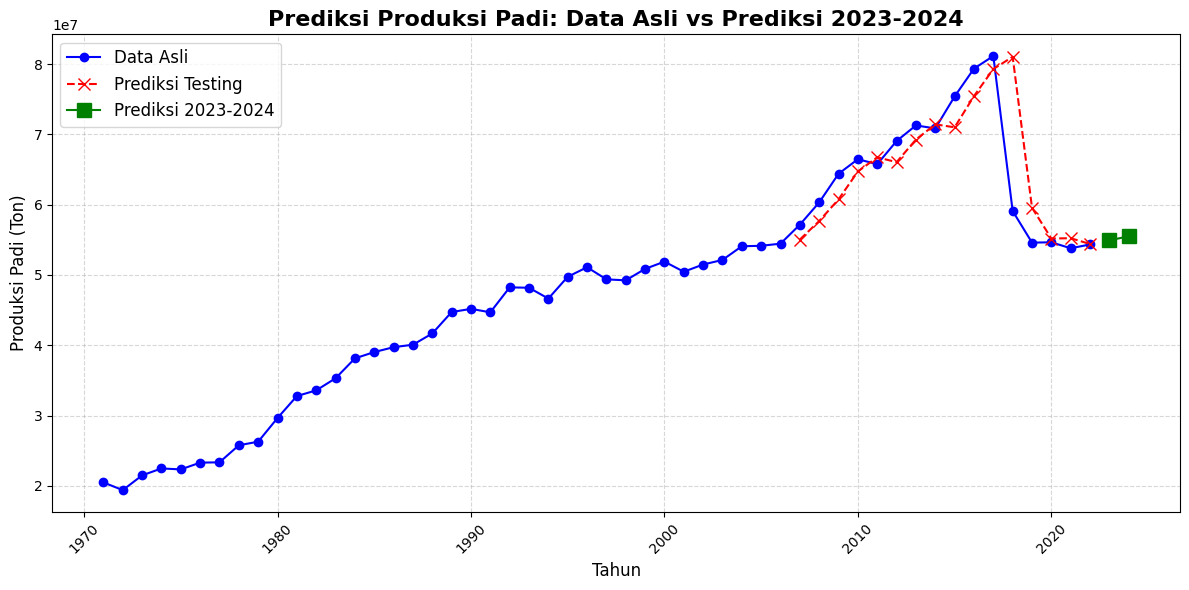

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame untuk membandingkan data asli dan prediksi
testing_results = pd.DataFrame({
    'Tahun': data_lagged['Tahun'].iloc[-len(y_test):],  # Tahun dari data testing
    'Produksi_Asli': y_test,
    'Produksi_Prediksi': y_pred
})

# Menambahkan prediksi 2023 dan 2024 ke dalam dataset
tahun_prediksi = [2023, 2024]
produksi_prediksi = [prediction_2023[0], prediction_2024[0]]

prediksi_df = pd.DataFrame({
    'Tahun': tahun_prediksi,
    'Produksi_Prediksi': produksi_prediksi
})

# Plot data asli (training dan testing) dan prediksi
plt.figure(figsize=(12, 6))

# Data Asli (Training + Testing)
plt.plot(data_lagged['Tahun'], data_lagged['Produksi_Padi'], label='Data Asli', marker='o', color='blue', linestyle='-', markersize=6)

# Prediksi Testing
plt.plot(testing_results['Tahun'], testing_results['Produksi_Prediksi'], label='Prediksi Testing', linestyle='--', marker='x', color='red', markersize=8)

# Prediksi 2023-2024
plt.plot(prediksi_df['Tahun'], prediksi_df['Produksi_Prediksi'], label='Prediksi 2023-2024', linestyle='-', marker='s', color='green', markersize=10)

# Menambahkan label dan judul
plt.title("Prediksi Produksi Padi: Data Asli vs Prediksi 2023-2024", fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Produksi Padi (Ton)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan grafik
plt.tight_layout()
plt.show()
